In [1]:
import pandas as pd
import numpy as np
from collections import Counter
pd.options.display.max_rows=100

In [2]:
all_labels = pd.read_pickle('/home/prateekagarw_umass_edu/p_file/all_labels')
all_labels

,image_name,adjective_1,adjective_2,negative_adj,object_1,object_2
0,p_0.jpg,bigger,smaller,"[bluer, hairier]",dogs,
1,p_1.jpg,cleaner,dirtier,[bigger],hands,
2,p_2.jpg,hairier,balder,"[longer, thicker]",cats,
3,p_3.jpg,younger,older,"[denser, cleaner]",persons,
4,p_5.jpg,colder,hotter,"[fuller, curvier]",drinks,
...,...,...,...,...,...,...
252,k_60.jpg,fatter,skinnier,"[narrower, fancier, taller]",people,
253,k_61.jpg,nearer,farther,"[heavier, bluer, smoother]",objects,
254,k_62.jpg,shinier,duller,"[heavier, curvier, curlier]",piggybank,santa
255,k_63.jpg,fatter,skinnier,"[drier, broader, blacker]",fishes,


In [3]:
#Modeling 
import pandas as pd
import os
import glob
import numpy as np
import time
import requests
import random
import matplotlib.pyplot as plt
from PIL import Image
import requests
import torch
import torch.nn as nn
from transformers import CLIPProcessor, CLIPModel
model_name = "openai/clip-vit-base-patch32"
# model_name = "openai/clip-vit-large-patch14"
model = CLIPModel.from_pretrained(model_name)
processor = CLIPProcessor.from_pretrained(model_name)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device).eval()

In [4]:
#Load Adjectives (No None)
adjectives_list = all_labels['adjective_1'].tolist()
#Load Antonyms (Does have None)
antonyms_list = all_labels['adjective_2'].tolist()
#Unique Adjectives
adjectives = Counter(adjectives_list)
# adjectives.update(antonyms_list)
unique_adjectives = list(adjectives.keys())
# unique_adjectives.remove("None")
print(len(unique_adjectives))

39


In [15]:
#make a list of prompts
groundtruth_labels = [ ]
scores = [ ]
adj_prompts_list = [f'The objects in this image can be compared using the adjective "{k}"' for k in unique_adjectives]
accuracy = 0
predicted_indices = []
wrong_adjectives = [ ]
wrong_images = [ ]
k=10

for idx,row in all_labels.iterrows():
    
  img_name, adjective, antonym = row['image_name'],row['adjective_1'],row['adjective_2']

  img_path = "/home/prateekagarw_umass_edu/p_file/all_aug/" + img_name
  img = Image.open(img_path)

  groundtruth_labels.append(unique_adjectives.index(adjective))
  
  inputs = processor(text=adj_prompts_list, images=img, return_tensors="pt", padding=True).to(device)
  outputs = model(**inputs).logits_per_image
  probs = outputs.softmax(dim=1) 
  scores.append(probs.cpu().detach().numpy())

  prob, idxs = probs[0].topk(10)
  top_adj_prompts = [unique_adjectives[i] for i in idxs[:k]]

  # print("groundtruth adjective is "+ adjective + " and its antonym is " + antonym)
  # predicted_index = top_adj_prompts.index(correct_adjective)
  # avg_index += predicted_index
  # predicted_indices.append(predicted_index)
  # print(top_adj_prompts)
  # plt.figure(figsize=(8, 10))
  # plt.imshow(np.asarray(img))
  # plt.show()
 
#   if antonym!="None" and antonym in top_adj_prompts:
#     accuracy+=1
  if adjective not in top_adj_prompts:
        wrong_adjectives.append(adjective)
        wrong_images.append(img_name)
        print(img_name, adjective, top_adj_prompts[0])
        
        

#     accuracy+=1
#   else:
#     continue
# print(accuracy/len(img_name_list))
# print(avg_index/len(sided_df["adjective"]))

p_1.jpg cleaner blacker
p_7.jpg harder curlier
p_23.jpg fuller thicker
p_27.jpg shinier harder
p_29.jpg smoother riper
p_30.jpg rustier coarser
p_37.jpg fuller smoother
p_38.jpg longer coarser
p_44.jpg nearer riper
p_45.jpg flatter coarser
p_47.jpg flatter thicker
p_49.jpg narrower cleaner
p_51.jpg thicker fresher
p_56.jpg higher fancier
p_62.jpg rustier curlier
p_63.jpg rustier coarser
p_65.jpg blacker newer
p_69.jpg smoother heavier
p_72.jpg thicker riper
p_74.jpg shinier newer
p_76.jpg darker clearer
p_79.jpg harder riper
p_80.jpg fewer fresher
p_81.jpg flakier fresher
p_82.jpg clearer curlier
p_84.jpg fuller heavier
l_1.jpg curvier bluer
l_6.jpg fuller fancier
l_8.jpg deeper coarser
l_9.jpg blacker smoother
l_11.jpg bigger curlier
l_21.jpg bigger sharper
l_26.jpg harder coarser
l_29.jpg rustier narrower
l_31.jpg nearer coarser
l_32.jpg denser bluer
l_38.jpg cleaner thicker
l_44.jpg flakier riper
l_45.jpg deeper shinier
l_46.jpg fuller sunnier
d_0.jpg flatter coarser
d_8.jpg narrowe

In [16]:
adjective_error_analysis = Counter(wrong_adjectives)
print(adjective_error_analysis)

Counter({'fuller': 8, 'nearer': 8, 'darker': 8, 'cleaner': 6, 'smoother': 6, 'bigger': 6, 'broader': 5, 'harder': 4, 'rustier': 4, 'flatter': 4, 'thicker': 4, 'heavier': 4, 'narrower': 3, 'higher': 3, 'blacker': 3, 'deeper': 3, 'denser': 3, 'shinier': 2, 'longer': 2, 'fewer': 2, 'flakier': 2, 'clearer': 2, 'curvier': 2, 'fancier': 2, 'taller': 2, 'newer': 1, 'fresher': 1, 'colder': 1, 'drier': 1, 'bluer': 1})


1 0.22568093385214008
3 0.39299610894941633
5 0.4669260700389105
10 0.5992217898832685
15 0.7315175097276264
20 0.8210116731517509
25 0.8638132295719845
30 0.9299610894941635
35 0.9883268482490273


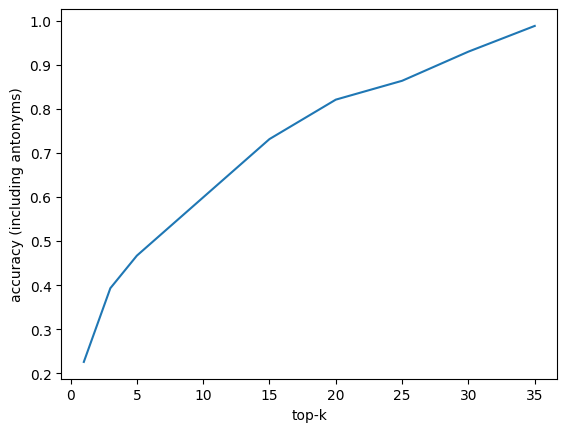

In [17]:
scores_np = np.asarray(scores).squeeze(1)
from sklearn.metrics import top_k_accuracy_score
k_s = [1,3,5,10,15,20,25,30,35]
k_scores = [ ]
for k in k_s:
  k_score = top_k_accuracy_score(np.array(groundtruth_labels),np.asarray(scores).squeeze(1),k = k)
  print(str(k) +" "+ str(k_score))
  k_scores.append(k_score)

k_scores = np.array(k_scores)
np.save('PlainBaselineScores',k_scores)

plt.plot(k_s,k_scores)
plt.xlabel("top-k")
plt.ylabel("accuracy (including antonyms)")
plt.show()